## Теоретический материал – Эволюционные методы

Деревья решений являются одним из наиболее эффективных
Эволюционные методы
Эволюционные методы относятся к числу эффективных средств
решения задач оптимизации и структурного синтеза проектных решений.
Они основаны на использовании принципов оптимального приспособления
организмов в живой природе к условиям окружающей среды. К числу
эволюционных относятся методы генетические, колонии муравьев,
поведения толпы. Наиболее развиты и востребованы в настоящее время
генетические алгоритмы. По мере развития техники и технологий растет
доля сложных задач проектирования и управления, для решения которых
применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта.
Генетические алгоритмы Для применения ГА необходимо:
1. выделить совокупность свойств объекта, характеризуемых
внутренними параметрами и влияющих на его полезность, т.е. выделить
множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут
быть величины различных типов (real, integer, Boolean, enumeration).
Наличие нечисловых величин (enumeration) обусловливает возможность
решения задач не только параметрической, но и структурной оптимизации;
2. сформулировать количественную оценку полезности вариантов
объекта — функцию полезности F. Если в исходном виде задача
многокритериальна, то такая формулировка означает выбор скалярного
(обобщенного) критерия;
3. представить вектор X в форме хромосомы — записи
следующего вида:
Этапы генетического алгоритма могут быть представлены в
следующем виде:
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
 { Выбор родительской пары хромосом;
 Кроссовер;
 Мутации;
 Оценка функции полезности F потомков;
 Селекция;
 }
 Замена текущего поколения новым;
}

### 1.1.1 Пример
Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества по указанной схеме:
Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.


In [17]:
def qz(x,y):
    return (x-3*y+1)/(3*x**2+3*y**2+1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldx, oldy, sortedID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldx[sortedID[2]]
    X[3] = oldx[sortedID[2]]
    X[0] = oldx[sortedID[0]]
    X[1]=oldx[sortedID[1]]

    Y[0]=oldy[sortedID[2]]
    Y[1]=oldy[sortedID[2]]
    Y[2]=oldy[sortedID[0]]
    Y[3]=oldy[sortedID[1]]
    return X,Y

def sorting(Z):
    sortedID = sorted(range(len(Z)),key=lambda k:Z[k])
    return sortedID


#Evo
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z


def evoSteps(X, Y, steps=4):
    results = []

    for i in range(4):
        arrZ = [qz(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results


X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]
results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]

print(f"max Z:  {max(qualityArrZ)}")

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:  1.0


### Задание
Вариант 2

In [18]:
def qz(x,y):
    return (x-2*y-3)/(x**2+3*y**2+1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldx, oldy, sortedID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldx[sortedID[2]]
    X[3] = oldx[sortedID[2]]
    X[0] = oldx[sortedID[0]]
    X[1] = oldx[sortedID[1]]

    Y[0]=oldy[sortedID[2]]
    Y[1]=oldy[sortedID[2]]
    Y[2]=oldy[sortedID[0]]
    Y[3]=oldy[sortedID[1]]
    return X,Y

def sorting(Z):
    sortedID = sorted(range(len(Z)),key=lambda k:Z[k])
    return sortedID


#Evo
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z


def evoSteps(X, Y, steps=4):
    results = []

    for i in range(4):
        arrZ = [qz(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results


X = [-4, -2, 0, 2]
Y = [-1, 1, 0, -2]
results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')
qualityArrZ=[]
for i in range(len(results[2])):
    qualityArrZ+=results[2][i][3]

print(f"max Z:  {max(qualityArrZ)}")

max_1_step: -3.948529411764706
max_2_step: -0.41227180527383367
max_3_step: -0.2720588235294117
max_4_step: 0.37449290060851925
max Z:  0.17647058823529413


## 1.2. Теоретический материал – Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется
отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из
названия, метод поиска моделирует процесс восстановления.
Восстановление – это физический процесс, который заключается в нагреве
и последующем контролируемом охлаждении субстанции. В результате
получается прочная кристаллическая структура, которая отличается от
структуры с дефектами, образующейся при быстром беспорядочном
охлаждении. Структура здесь представляет собой кодированное решение, а
температура используется для того, чтобы указать, как и когда будут
приниматься новые решения.
Алгоритм имитации отжига включает следующие этапы:
Текущее решение
Рабочее решение
Лучшее решение
Создание начального
решения
Оценка решение
Изменение решения
случайным образом
Оценка нового
решения
Критерий допуска
Уменьшение
температуры
Метод отжига может быть эффективным при решении задач
различных классов, требующих оптимизации. Ниже приводится их краткий
список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.
Поскольку метод отжига представляет собой процесс генерации
случайных чисел, поиск решения с использованием данного алгоритма
может занять значительное время. В некоторых случаях алгоритм вообще не
находит решение или выбирает не самое оптимальное. Алгоритм отжига как
способ выполнения процедур поиска и оптимизации. Данный метод является
аналогом процесса нагревания тела до состояния плавления с последующим
постепенным охлаждением. При высоких температурах поиск ведется по
всему диапазону. При снижении температуры диапазон поиска уменьшается
до небольшой области вокруг текущего решения.
Рассмотрим решение задачи поиска оптимального маршрута на графе
методом имитации отжига Для этого, представим формальную постановку
задачи и рассмотрим пример, который иллюстрирует алгоритм решения.
Итак, необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе
𝐾6 после четырех циклов решения задачи методом отжига. Даны расстояния
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности
перехода 𝑃𝑘, 𝑘 = 1, . . . , 4.
Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если
𝑃∗ = 100где снижение температуры происходит по закону 𝑇𝑘+1 = 0.5𝑇𝑘 от
𝑇1 = 100.

### 1.2.1 Пример
Итак, начальные условия задачи представляют собой следующий граф с
расстояниями между ребрами:

In [19]:
#Рассмотрим решение с применением Python.
#Импортируем библиотеки:
import networkx as nx
from math import e
#Далее, опишем массив длин ребер, последовательности прохождение
#вершин на маршруте и их замены, значения P, а также начальную
#температуру:

distances = [(1,2,20),
              (1,3,40),
              (1,4,42),
              (1,5,33),
              (1,6,21),
              (2,3,26),
              (2,4,38),
              (2,5,42),
              (2,6,17),
              (3,4,22),
              (3,5,43),
              (3,6,21),
              (4,5,27),
              (4,6,22),
              (5,6,26)]# длины ребер

V = [1,4,5,2,6,3,1] # последовательность прохождения маршрута
Z = [(3,4),
      (4,6),
      (5,2),
      (6,2)]# последовательность замен вершин
P = [49,54,43,54]# случайные числаб выпавшие в процессе счёта

T = 100 # начальная температура


In [20]:
# Запишем функции вероятности и изменения температуры:

# функция вероятности
def probability(delta,T):
  return 100*e**(-delta/T)

#функция изменения температуры
def reductTemp(prevT):
  nextT = 0.5 * prevT

  return nextT

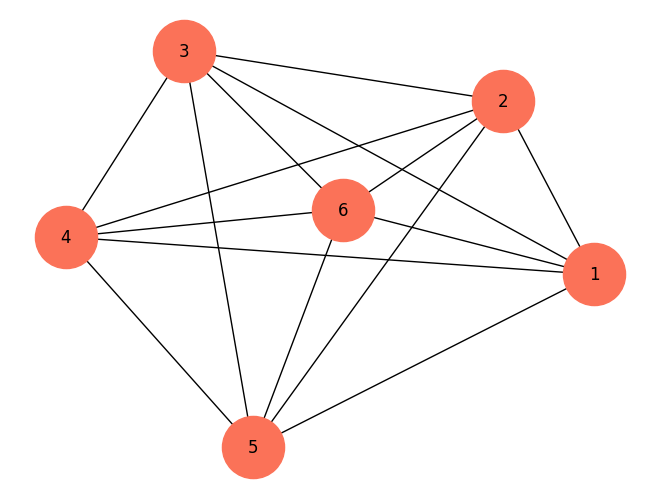

In [21]:
#Построим граф по заданным вершинам, как в начальном условии:

graph = nx.Graph() #создание пустого графа

graph.add_weighted_edges_from(distances) #добавление весов ребер

# отсортировка графа с заданными вершинами

nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size = 2000,with_labels = True)

In [22]:
#Вычисление длины ребра
def edgeLenght(i,j,distances,roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0]==j) else -1)for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j)else -1)for item in distances])


In [23]:

#Вычислим длину маршрута

#Вычисление длины маршрута
def routeLength(V,distances):
  edges = []

  for i in range(len(V)-1):
    edges.append(edgeLenght(V[i],V[i+1],distances))

  return sum(edges)

In [24]:
def routeOneReplacement(arrV,Z,replacementByName = True):
  decrement = 1 if replacementByName else 0

  arrV[Z[0] - decrement],arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

  return arrV

In [25]:
def routeReplacement(V,Z):
  for z in Z:
    V = routeOneReplacement(V,z)
  return V

In [26]:
def chooseRoute (distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длинны пути
  arrSum = [sumLength] # массив сумм длин

  # цикл перехода отжига
  for i in range(len(Z)):
    newV= routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
    newS = routeLength(newV, distances) # длина нового маршрута
    arrSum.append(newS)
    deltaS = newS - sumLength # разница между длинной нового и старого маршрутов

    # в случае если разница между длинами больше 0 то вычисляем вероятность
    if deltaS > 0:
      p = probability(deltaS, T) # подсчет вероятности

      # если заданная вероятность попадает в интервал от 0 до р то новый маршрут выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS

    T = reductTemp(T) # вычисление температуры

  return V, arrSum

In [27]:
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  #прохождение по вектору
  for i in range(len(bestRoute)-1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
        newDistances.append(distance)

  graph=nx.Graph()#создание пустого графа

  graph.add_weighted_edges_from(newDistances)# добавление весов ребер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai(graph,node_color = '#fb7258',node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута:146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


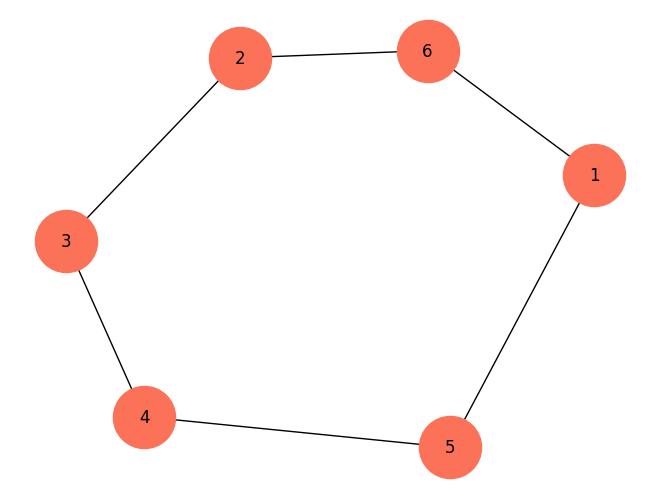

In [28]:
bestRoute, arrLength = chooseRoute(distances,V,Z,T,P)

print(f'Лучший выбранный маршрут: {bestRoute:}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances,bestRoute)# отрисовка лучшего маршрута

### Задание

In [30]:
import networkx as nx
from math import e
#Далее, опишем массив длин ребер, последовательности прохождение
#вершин на маршруте и их замены, значения P, а также начальную
#температуру:

distances = [(1,2,25),
              (1,3,41),
              (1,4,38),
              (1,5,27),
              (1,6,20),
              (2,3,21),
              (2,4,34),
              (2,5,39),
              (2,6,17),
              (3,4,24),
              (3,5,40),
              (3,6,22),
              (4,5,21),
              (4,6,21),
              (5,6,22)]# длины ребер

V = [1,3,5,4,6,2,1] # последовательность прохождения маршрута
Z = [(3,4),
      (4,6),
      (5,6),
      (2,4)]# последовательность замен вершин
P = [41,60,85,60]# случайные числаб выпавшие в процессе счёта

T = 100 # начальная температура

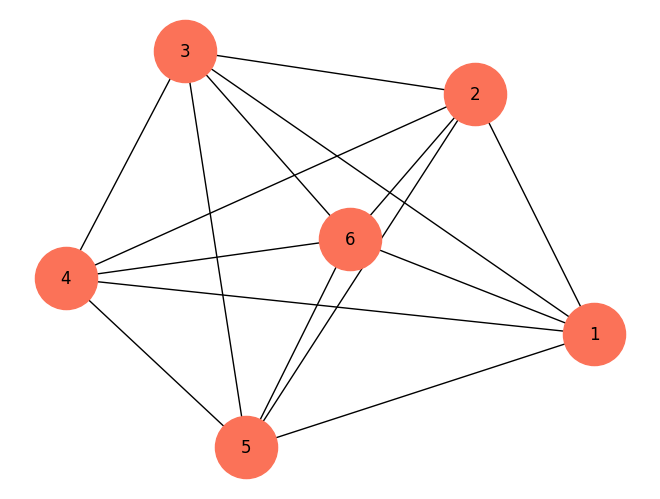

In [31]:
#Построим граф по заданным вершинам, как в начальном условии:

graph = nx.Graph() #создание пустого графа

graph.add_weighted_edges_from(distances) #добавление весов ребер

# отсортировка графа с заданными вершинами

nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size = 2000,with_labels = True)

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута:154
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


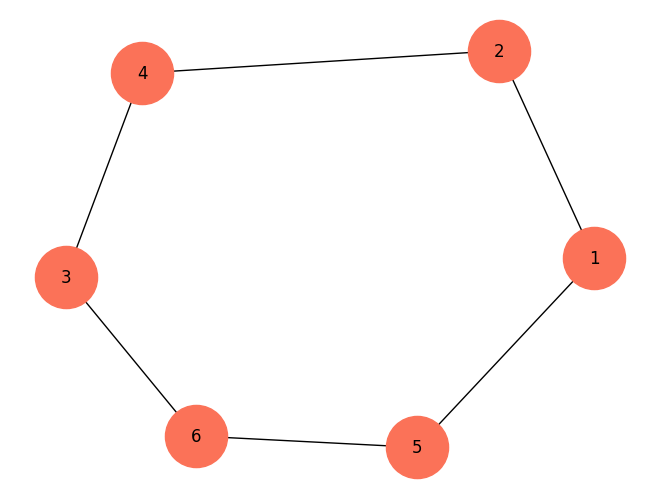

In [32]:
bestRoute, arrLength = chooseRoute(distances,V,Z,T,P)

print(f'Лучший выбранный маршрут: {bestRoute:}')
print(f'Длина лучшего выбранного маршрута:{routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances,bestRoute)# отрисовка лучшего маршрута